# Fidelity from Magnetic Field Distribution

In [85]:
import numpy as np
from My_Function import hadamard_evolution, z_evolution, create_grid,x_evolution, opt_x_evolution
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import pyplot as plt

Define input parameters:
- tot_field_variation = Gradient of field at the centre in T/mm
- sep = Separation between qubits on the chip in the x and y directions

create_grid returns 5x5 array containing distance between central qubit and outer qubits

In [86]:
setup = 'Our_setup'
sep = 0.05
tot_field_variation = 3*(10**(-6))
grid = create_grid(sep)

Multiply grid by field gradient to find what the 'extra' field at each point is

In [87]:
b_field = grid * tot_field_variation

$\Delta = g\mu_{B}\delta B$ is the coefficient that will go in front of $\sigma_{x}$ so we multiply our matrix by $ g\mu_{B}$

In [88]:
delta_H = b_field * 1.7588199959*(10**11)
delta_Z = b_field * 1.7588199959*(10**11)
delta_X = b_field * 1.7588199959*(10**11)
delta_opt_X = b_field * 1.7588199959*(10**11)

## Hadamard Evolution

Loop over the deltas in the matrix to give an output fidelity for each qubit position

In [89]:
with np.nditer(delta_H, op_flags=['readwrite']) as it:
    for x in it:
           x[...] = hadamard_evolution(x)

In [90]:
delta_H

array([[0.99999992, 0.99999997, 0.99999998, 0.99999997, 0.99999992],
       [0.99999997, 1.        , 1.        , 1.        , 0.99999997],
       [0.99999998, 1.        , 1.        , 1.        , 0.99999998],
       [0.99999997, 1.        , 1.        , 1.        , 0.99999997],
       [0.99999992, 0.99999997, 0.99999998, 0.99999997, 0.99999992]])

## Z-Evolution

In [91]:
with np.nditer(delta_Z, op_flags=['readwrite']) as it:
    for x in it:
           x[...] = z_evolution(x)

In [92]:
delta_Z

array([[0.99999994, 0.99999998, 0.99999998, 0.99999998, 0.99999994],
       [0.99999998, 1.        , 1.        , 1.        , 0.99999998],
       [0.99999998, 1.        , 1.        , 1.        , 0.99999998],
       [0.99999998, 1.        , 1.        , 1.        , 0.99999998],
       [0.99999994, 0.99999998, 0.99999998, 0.99999998, 0.99999994]])

## X-Evolution

In [93]:
with np.nditer(delta_X, op_flags=['readwrite']) as it:
    for x in it:
           x[...] = x_evolution(x)

In [94]:
delta_X

array([[0.99999994, 0.99999998, 0.99999998, 0.99999998, 0.99999994],
       [0.99999998, 1.        , 1.        , 1.        , 0.99999998],
       [0.99999998, 1.        , 1.        , 1.        , 0.99999998],
       [0.99999998, 1.        , 1.        , 1.        , 0.99999998],
       [0.99999994, 0.99999998, 0.99999998, 0.99999998, 0.99999994]])

## Optimised X-Evolution

In [95]:
with np.nditer(delta_opt_X, op_flags=['readwrite']) as it:
    for x in it:
           x[...] = opt_x_evolution(x)

In [96]:
delta_opt_X

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

## Plotting Results

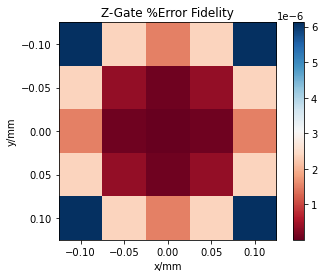

In [97]:
im = imshow((1-delta_Z)*100,cmap=cm.RdBu,extent=(-2.5*sep, 2.5*sep, 2.5*sep, -2.5*sep))
colorbar(im)
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('Z-Gate %Error Fidelity')
plt.savefig('Plots/Z-Gate_'+setup)

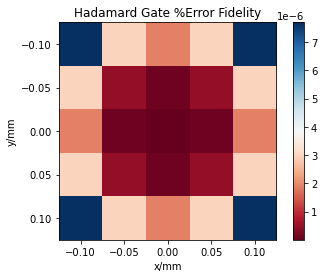

In [98]:
im = imshow((1-delta_H)*100,cmap=cm.RdBu,extent=(-2.5*sep, 2.5*sep, 2.5*sep, -2.5*sep))
colorbar(im)
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('Hadamard Gate %Error Fidelity')
plt.savefig('Plots/H_Gate_'+setup)

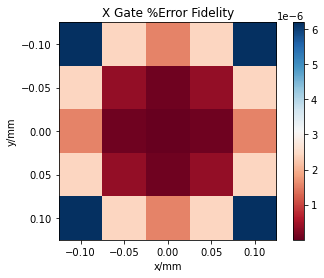

In [99]:
im = imshow((1-delta_X)*100,cmap=cm.RdBu,extent=(-2.5*sep, 2.5*sep, 2.5*sep, -2.5*sep))
colorbar(im)
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('X Gate %Error Fidelity')
plt.savefig('Plots/X-Gate_'+setup)

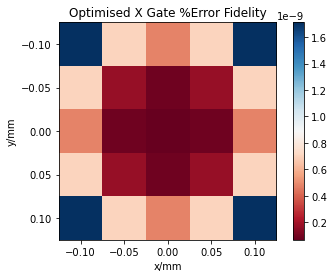

In [100]:
im = imshow((1-delta_opt_X)*100,cmap=cm.RdBu,extent=(-2.5*sep, 2.5*sep, 2.5*sep, -2.5*sep))
colorbar(im)
plt.xlabel('x/mm')
plt.ylabel('y/mm')
plt.title('Optimised X Gate %Error Fidelity')
plt.savefig('Plots/Opt_X-Gate_'+setup)